ETR 

ETR 

# ETR

In [108]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [109]:
df = pd.read_csv('DATA/incident_event_log.csv')

# Strip leading/trailing spaces from column names
df.columns = df.columns.str.strip()
# Strip leading/trailing spaces from all column 
df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)


In [110]:
df 

,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,...,u_priority_confirmation,notify,problem_id,rfc,vendor,caused_by,closed_code,resolved_by,resolved_at,closed_at
0,INC0000045,New,true,0,0,0,true,Caller 2403,Opened by 8,29/2/2016 01:16,...,false,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
1,INC0000045,Resolved,true,0,0,2,true,Caller 2403,Opened by 8,29/2/2016 01:16,...,false,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
2,INC0000045,Resolved,true,0,0,3,true,Caller 2403,Opened by 8,29/2/2016 01:16,...,false,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
3,INC0000045,Closed,false,0,0,4,true,Caller 2403,Opened by 8,29/2/2016 01:16,...,false,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
4,INC0000047,New,true,0,0,0,true,Caller 2403,Opened by 397,29/2/2016 04:40,...,false,Do Not Notify,?,?,?,?,code 5,Resolved by 81,1/3/2016 09:52,6/3/2016 10:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119993,INC0029231,Resolved,true,0,0,8,true,Caller 2321,Opened by 17,13/5/2016 11:46,...,true,Do Not Notify,?,?,?,?,code 7,Resolved by 11,13/5/2016 12:15,18/5/2016 13:07
119994,INC0029231,Closed,false,0,0,9,true,Caller 2321,Opened by 17,13/5/2016 11:46,...,true,Do Not Notify,?,?,?,?,code 7,Resolved by 11,13/5/2016 12:15,18/5/2016 13:07
119995,INC0029232,Resolved,true,0,0,0,true,Caller 382,Opened by 108,13/5/2016 11:48,...,false,Do Not Notify,?,?,?,?,code 6,Resolved by 52,?,18/5/2016 12:07
119996,INC0029232,Closed,false,0,0,1,true,Caller 382,Opened by 108,13/5/2016 11:48,...,false,Do Not Notify,?,?,?,?,code 6,Resolved by 52,?,18/5/2016 12:07


In [111]:
df.describe
df.info 

<bound method DataFrame.info of             number incident_state active  reassignment_count  reopen_count  \
0       INC0000045            New   true                   0             0   
1       INC0000045       Resolved   true                   0             0   
2       INC0000045       Resolved   true                   0             0   
3       INC0000045         Closed  false                   0             0   
4       INC0000047            New   true                   0             0   
...            ...            ...    ...                 ...           ...   
119993  INC0029231       Resolved   true                   0             0   
119994  INC0029231         Closed  false                   0             0   
119995  INC0029232       Resolved   true                   0             0   
119996  INC0029232         Closed  false                   0             0   
119997  INC0029233            New   true                   0             0   

        sys_mod_count made_sla 

In [112]:
print(df.describe(include='all'))

            number incident_state  active  reassignment_count   reopen_count  \
count       119998         119998  119998       119998.000000  119998.000000   
unique       20769              9       2                 NaN            NaN   
top     INC0019396         Active    true                 NaN            NaN   
freq            58          33582   99172                 NaN            NaN   
mean           NaN            NaN     NaN            1.151236       0.021025   
std            NaN            NaN     NaN            1.782823       0.196173   
min            NaN            NaN     NaN            0.000000       0.000000   
25%            NaN            NaN     NaN            0.000000       0.000000   
50%            NaN            NaN     NaN            1.000000       0.000000   
75%            NaN            NaN     NaN            2.000000       0.000000   
max            NaN            NaN     NaN           27.000000       8.000000   

        sys_mod_count made_sla    calle

<Axes: >

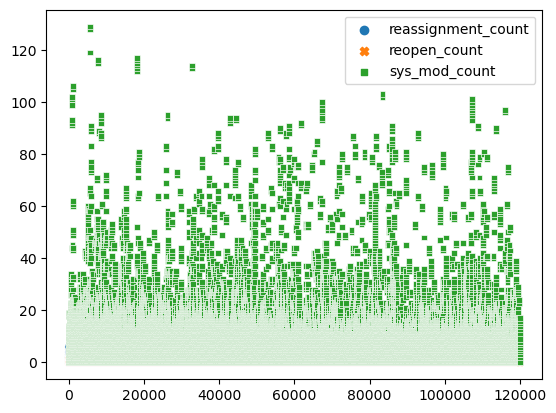

In [113]:

sns.scatterplot(df)

In [114]:
df.columns

Index(['number', 'incident_state', 'active', 'reassignment_count',
       'reopen_count', 'sys_mod_count', 'made_sla', 'caller_id', 'opened_by',
       'opened_at', 'sys_created_by', 'sys_created_at', 'sys_updated_by',
       'sys_updated_at', 'contact_type', 'location', 'category', 'subcategory',
       'u_symptom', 'cmdb_ci', 'impact', 'urgency', 'priority',
       'assignment_group', 'assigned_to', 'knowledge',
       'u_priority_confirmation', 'notify', 'problem_id', 'rfc', 'vendor',
       'caused_by', 'closed_code', 'resolved_by', 'resolved_at', 'closed_at'],
      dtype='object')

In [115]:
df.incident_state.unique()

array(['New', 'Resolved', 'Closed', 'Active', 'Awaiting User Info',
       'Awaiting Problem', 'Awaiting Vendor', 'Awaiting Evidence', '-100'],
      dtype=object)

In [116]:
df[df.incident_state=='-100'].shape

(2, 36)

In [117]:
#assumming -100 is a error code we remove it 
df=df[df.incident_state!="-100"]

In [118]:
df.incident_state.unique()

array(['New', 'Resolved', 'Closed', 'Active', 'Awaiting User Info',
       'Awaiting Problem', 'Awaiting Vendor', 'Awaiting Evidence'],
      dtype=object)

In [119]:
# replaces 
df.replace('?', np.nan, inplace=True)
print(df.isnull().sum())


number                          0
incident_state                  0
active                          0
reassignment_count              0
reopen_count                    0
sys_mod_count                   0
made_sla                        0
caller_id                      29
opened_by                    4835
opened_at                       0
sys_created_by              42354
sys_created_at              42354
sys_updated_by                  0
sys_updated_at                  0
contact_type                    0
location                       76
category                       64
subcategory                    97
u_symptom                   28269
cmdb_ci                    119560
impact                          0
urgency                         0
priority                        0
assignment_group            14213
assigned_to                 23030
knowledge                       0
u_priority_confirmation         0
notify                          0
problem_id                 118059
rfc           

C:\Users\simon\AppData\Local\Temp\ipykernel_23444\1632718720.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.replace('?', np.nan, inplace=True)


In [120]:
# drop problems that havent been resloved 
# df = df.dropna(subset=["resolved_at", "closed_at"])

In [121]:
# Strip leading/trailing spaces from column names
#df.columns = df.columns.str.strip()

# Convert date columns to datetime with error handling
date_columns = ['opened_at', 'sys_created_at', 'sys_updated_at', 'resolved_at', 'closed_at']
for col in date_columns:
    if col in df.columns:
        df[col] = pd.to_datetime(df[col].str.strip(), format='%d/%m/%Y %H:%M', errors='coerce')

# Verify the changes
print(df.info())


C:\Users\simon\AppData\Local\Temp\ipykernel_23444\2076289272.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = pd.to_datetime(df[col].str.strip(), format='%d/%m/%Y %H:%M', errors='coerce')
C:\Users\simon\AppData\Local\Temp\ipykernel_23444\2076289272.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = pd.to_datetime(df[col].str.strip(), format='%d/%m/%Y %H:%M', errors='coerce')


<class 'pandas.core.frame.DataFrame'>
Index: 119996 entries, 0 to 119997
Data columns (total 36 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   number                   119996 non-null  object        
 1   incident_state           119996 non-null  object        
 2   active                   119996 non-null  object        
 3   reassignment_count       119996 non-null  int64         
 4   reopen_count             119996 non-null  int64         
 5   sys_mod_count            119996 non-null  int64         
 6   made_sla                 119996 non-null  object        
 7   caller_id                119967 non-null  object        
 8   opened_by                115161 non-null  object        
 9   opened_at                119996 non-null  datetime64[ns]
 10  sys_created_by           77642 non-null   object        
 11  sys_created_at           77642 non-null   datetime64[ns]
 12  sys_updated_by       

C:\Users\simon\AppData\Local\Temp\ipykernel_23444\2076289272.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = pd.to_datetime(df[col].str.strip(), format='%d/%m/%Y %H:%M', errors='coerce')
C:\Users\simon\AppData\Local\Temp\ipykernel_23444\2076289272.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = pd.to_datetime(df[col].str.strip(), format='%d/%m/%Y %H:%M', errors='coerce')
C:\Users\simon\AppData\Local\Temp\ipykernel_23444\2076289272.py:8: SettingWithCopyWarning: 
A value is trying 

In [122]:
binary_columns = [col for col in df.columns if df[col].nunique() == 2]

# Print the list of binary columns
print("Binary columns:", binary_columns)

Binary columns: ['active', 'made_sla', 'contact_type', 'knowledge', 'u_priority_confirmation', 'notify', 'caused_by']


In [123]:
# Convert specific columns to boolean type
columns_to_boolean = ['active', 'made_sla', 'u_priority_confirmation', 'knowledge']

# Convert the selected columns
for col in columns_to_boolean:
    df[col] = df[col].astype(bool)

# Verify the changes
print(df[columns_to_boolean].dtypes)
print(df.head())

active                     bool
made_sla                   bool
u_priority_confirmation    bool
knowledge                  bool
dtype: object
       number incident_state  active  reassignment_count  reopen_count  \
0  INC0000045            New    True                   0             0   
1  INC0000045       Resolved    True                   0             0   
2  INC0000045       Resolved    True                   0             0   
3  INC0000045         Closed    True                   0             0   
4  INC0000047            New    True                   0             0   

   sys_mod_count  made_sla    caller_id       opened_by           opened_at  \
0              0      True  Caller 2403    Opened by  8 2016-02-29 01:16:00   
1              2      True  Caller 2403    Opened by  8 2016-02-29 01:16:00   
2              3      True  Caller 2403    Opened by  8 2016-02-29 01:16:00   
3              4      True  Caller 2403    Opened by  8 2016-02-29 01:16:00   
4              0  

C:\Users\simon\AppData\Local\Temp\ipykernel_23444\1859295890.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].astype(bool)
C:\Users\simon\AppData\Local\Temp\ipykernel_23444\1859295890.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].astype(bool)
C:\Users\simon\AppData\Local\Temp\ipykernel_23444\1859295890.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

In [124]:
for column in df.columns:
    unique_values = df[column].unique()
    num_unique_values = len(unique_values)
    
    if num_unique_values <= 30:
        print(f"Column '{column}' has {num_unique_values} unique values:")
        print(unique_values)
    else:
        print(f"Column '{column}' has {num_unique_values} unique values, which is more than 15. Not displaying values.")
    
    print('-' * 40)

Column 'number' has 20769 unique values, which is more than 15. Not displaying values.
----------------------------------------
Column 'incident_state' has 8 unique values:
['New' 'Resolved' 'Closed' 'Active' 'Awaiting User Info'
 'Awaiting Problem' 'Awaiting Vendor' 'Awaiting Evidence']
----------------------------------------
Column 'active' has 1 unique values:
[ True]
----------------------------------------
Column 'reassignment_count' has 28 unique values:
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27]
----------------------------------------
Column 'reopen_count' has 9 unique values:
[0 1 2 3 4 5 6 7 8]
----------------------------------------
Column 'sys_mod_count' has 115 unique values, which is more than 15. Not displaying values.
----------------------------------------
Column 'made_sla' has 1 unique values:
[ True]
----------------------------------------
Column 'caller_id' has 4829 unique values, which is more than 15. Not displaying 

In [125]:
pd.set_option('display.max_columns', None)  # Display all columns
pd.set_option('display.max_rows', None)     # Display all rows
pd.set_option('display.max_colwidth', None) # Display full column width

# Now run your sample
df.sample(1)



,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,sys_created_by,sys_created_at,sys_updated_by,sys_updated_at,contact_type,location,category,subcategory,u_symptom,cmdb_ci,impact,urgency,priority,assignment_group,assigned_to,knowledge,u_priority_confirmation,notify,problem_id,rfc,vendor,caused_by,closed_code,resolved_by,resolved_at,closed_at
10669,INC0002448,New,True,6,0,7,True,Caller 2271,Opened by 59,2016-03-04 11:42:00,Created by 34,2016-03-04 11:47:00,Updated by 241,2016-03-11 14:35:00,Phone,Location 93,Category 34,Subcategory 154,Symptom 112,NaN,2 - Medium,2 - Medium,3 - Moderate,Group 9,Resolver 69,True,True,Do Not Notify,NaN,NaN,NaN,NaN,code 6,Resolved by 62,2016-04-06 12:22:00,2016-04-11 12:59:00


In [126]:
pd.reset_option('display.max_columns')
pd.reset_option('display.max_rows')
pd.reset_option('display.max_colwidth')


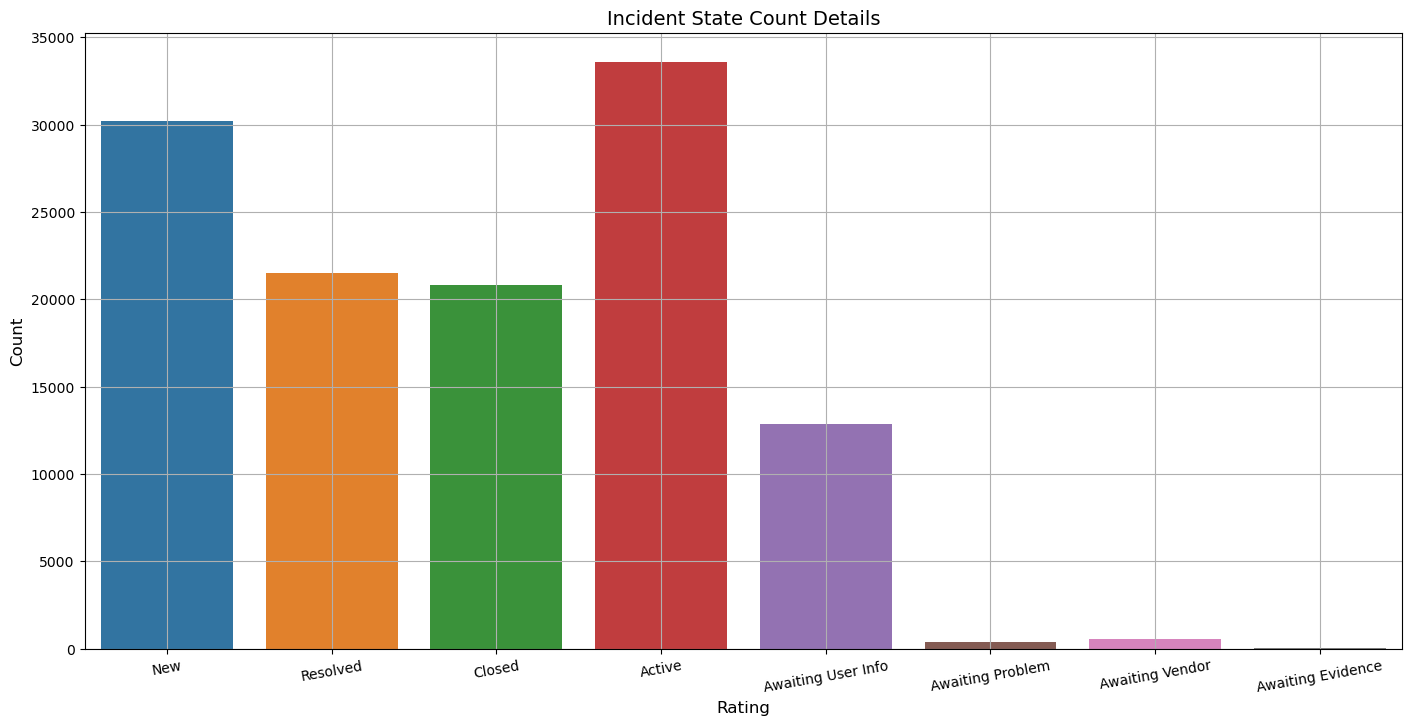

In [127]:
# Set the dimensions of the figure
fig_dims = (17, 8)
fig, ax = plt.subplots(figsize=fig_dims)

# Create a count plot of 'incident_state'
sns.countplot(x='incident_state', data=df, ax=ax)

# Customize the plot
plt.title("Incident State Count Details", size=14)
plt.xlabel("Rating", size=12)
hue='category'
plt.ylabel("Count", size=12)
plt.xticks(rotation=10)
plt.grid()

# Display the plot
plt.show()


In [128]:
df.describe
df.info 

<bound method DataFrame.info of             number incident_state  active  reassignment_count  reopen_count  \
0       INC0000045            New    True                   0             0   
1       INC0000045       Resolved    True                   0             0   
2       INC0000045       Resolved    True                   0             0   
3       INC0000045         Closed    True                   0             0   
4       INC0000047            New    True                   0             0   
...            ...            ...     ...                 ...           ...   
119993  INC0029231       Resolved    True                   0             0   
119994  INC0029231         Closed    True                   0             0   
119995  INC0029232       Resolved    True                   0             0   
119996  INC0029232         Closed    True                   0             0   
119997  INC0029233            New    True                   0             0   

        sys_mod_cou

In [129]:
df.columns
df.sample(1)

,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,...,u_priority_confirmation,notify,problem_id,rfc,vendor,caused_by,closed_code,resolved_by,resolved_at,closed_at
42529,INC0009539,New,True,0,0,0,True,Caller 3781,Opened by 17,2016-03-21 14:32:00,...,True,Do Not Notify,NaN,NaN,NaN,NaN,code 6,Resolved by 62,2016-03-29 10:18:00,2016-04-03 10:59:00


In [130]:
df['response_time_num'] =   (df.resolved_at - df.opened_at ).dt.total_seconds()

C:\Users\simon\AppData\Local\Temp\ipykernel_23444\3171927368.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['response_time_num'] =   (df.resolved_at - df.opened_at ).dt.total_seconds()


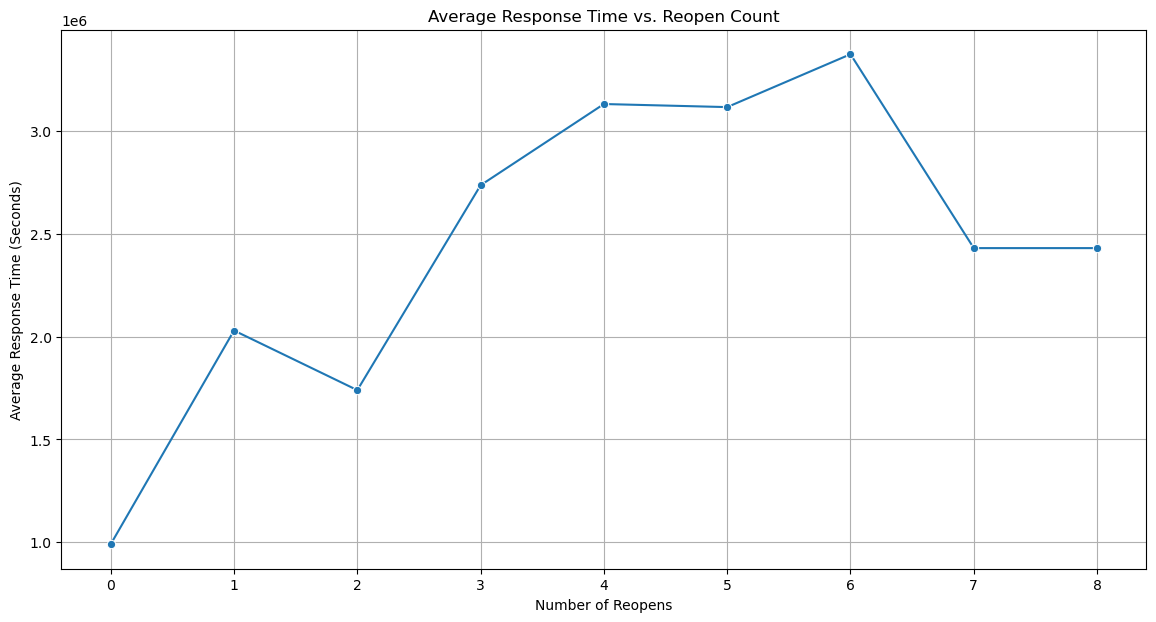

In [131]:
# Aggregate the data by calculating the mean response time for each reopen count
reopen_response_avg = df.groupby('reopen_count')['response_time_num'].mean().reset_index()

# Set the dimensions for the plot
plt.figure(figsize=(14, 7))

# Plot the aggregated data with a line plot
sns.lineplot(data=reopen_response_avg, x='reopen_count', y='response_time_num', marker='o')

# Customize the plot
plt.title("Average Response Time vs. Reopen Count")
plt.xlabel("Number of Reopens")
plt.ylabel("Average Response Time (Seconds)")  # Adjust the unit if not converting to hours
plt.grid(True)

# Show the plot
plt.show()


# Data Preparation